# Machine Learning Project 3 - Calories Burnt Prediction

In [126]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold,train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
import math
import re
df=pd.read_csv('merge_calories.csv')
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [130]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [132]:
# Checking for null values, if there taking total of null values 
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [134]:
# Dropping column 
df.drop(['User_ID'],axis=1,inplace=True)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,female,20,193,86,11,92,40.4,45
14996,female,27,165,65,6,85,39.2,23
14997,female,43,159,58,16,90,40.1,75
14998,male,78,193,97,2,84,38.3,11


In [136]:
# Checking any duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [138]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


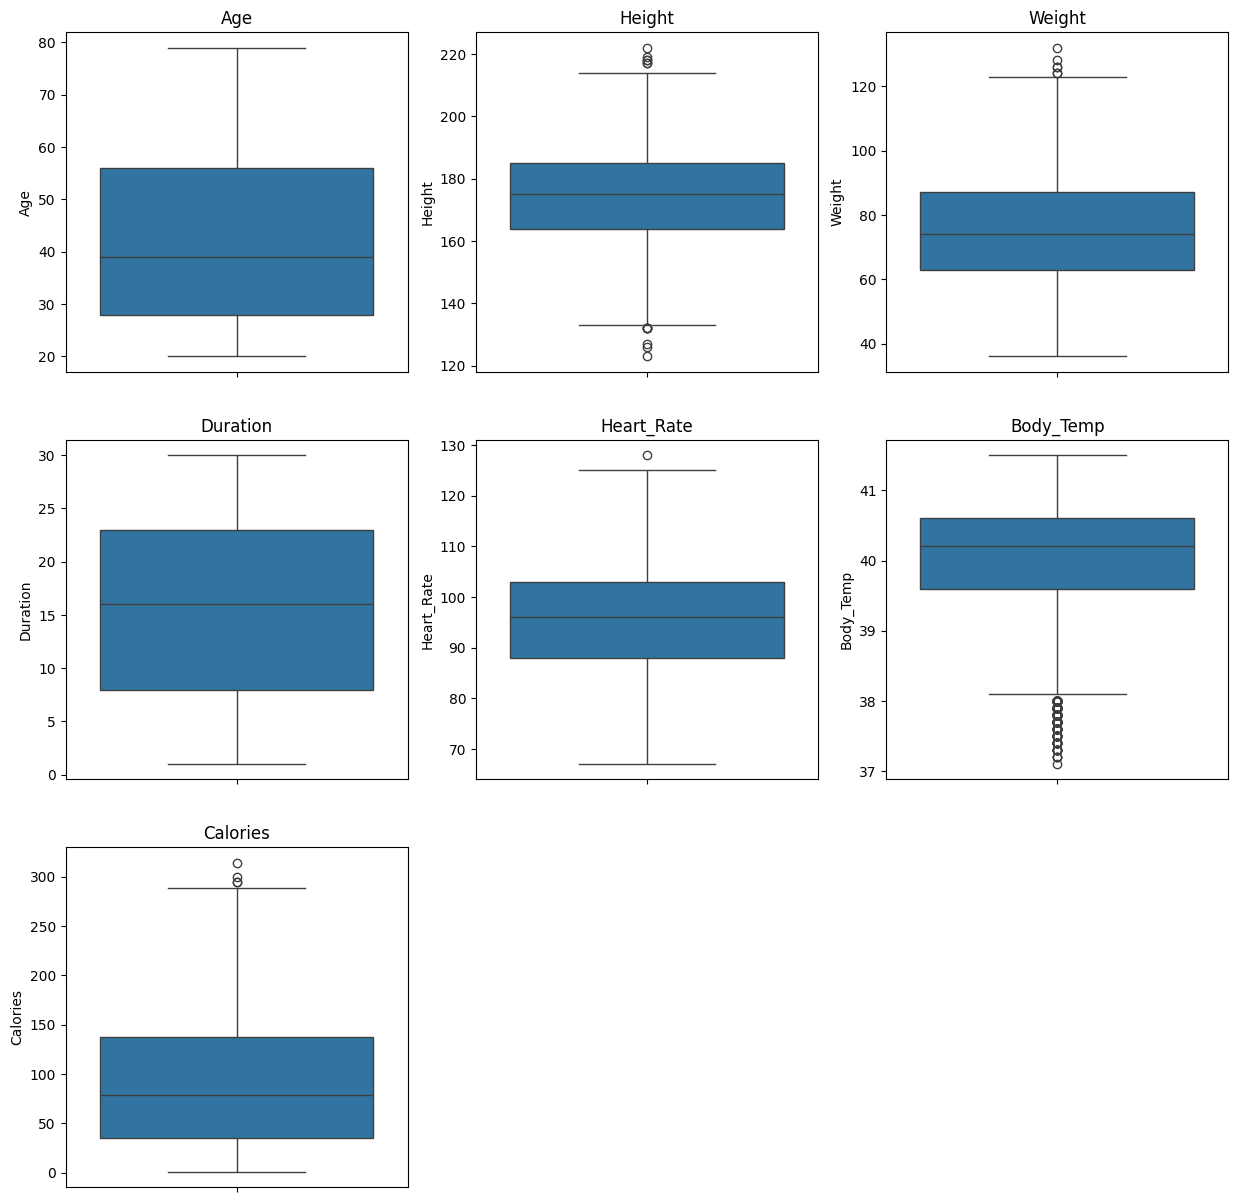

In [140]:
# Checking outliers in numerical columns using boxplot
plt.figure(figsize=(15,15))
Numericals=['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']
plot=1
for i in Numericals:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [142]:
# Removing outliers using IQR method
Numericals=['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']
for i in Numericals:
    flag=True
    while(flag):
        q25,q75=np.percentile(df[i],[25,75])
        IQR=q75-q25
        lower_limit=q25-1.5*IQR
        upper_limit=q75+1.5*IQR
        if(df[i]<lower_limit).sum() or (df[i]>upper_limit).sum():
            df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])
            df[i]=np.where(df[i]<lower_limit,upper_limit,df[i])
            flag=True
        else:
            flag=False

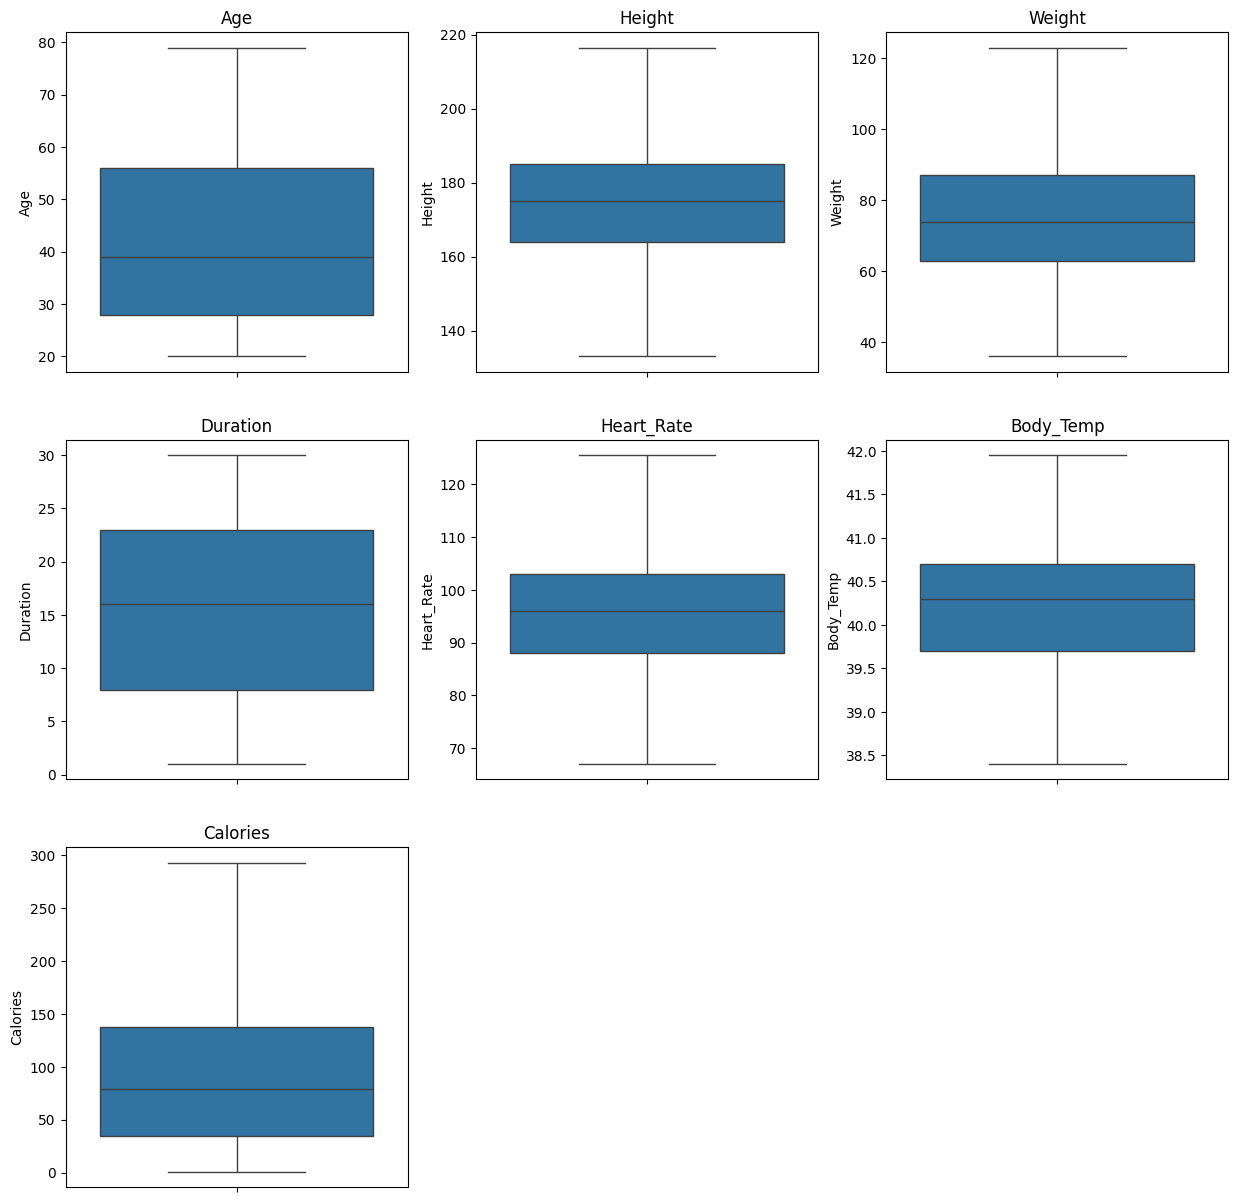

In [144]:
# Rechecking outliers using boxplot
plt.figure(figsize=(15,15))
Numericals=['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']
plot=1
for i in Numericals:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  int64  
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [148]:
# Converting categorical columns into numerical columns using LabelEncoder
le=LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])

In [150]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29,105.0,40.80,231.0
1,0,20,166.0,60.0,14,94.0,40.30,66.0
2,1,69,179.0,79.0,5,88.0,38.70,26.0
3,0,34,179.0,71.0,13,100.0,40.50,71.0
4,0,27,154.0,58.0,10,81.0,39.80,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11,92.0,40.40,45.0
14996,0,27,165.0,65.0,6,85.0,39.20,23.0
14997,0,43,159.0,58.0,16,90.0,40.10,75.0
14998,1,78,193.0,97.0,2,84.0,41.95,11.0


In [152]:
# Split -Dependent and Independent Variables
x=df.drop(['Calories'],axis=1)
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29,105.0,40.80
1,0,20,166.0,60.0,14,94.0,40.30
2,1,69,179.0,79.0,5,88.0,38.70
3,0,34,179.0,71.0,13,100.0,40.50
4,0,27,154.0,58.0,10,81.0,39.80
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11,92.0,40.40
14996,0,27,165.0,65.0,6,85.0,39.20
14997,0,43,159.0,58.0,16,90.0,40.10
14998,1,78,193.0,97.0,2,84.0,41.95


In [154]:
y=df.Calories
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [36]:
# Cross Validation Using KFold
models = {
    'Linear': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'CatBoost': CatBoostRegressor(silent=True),
    'KNeighbors': KNeighborsRegressor() }

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = [] 

for model_name, model in models.items():
    fold_mse = [] 
    for train_index, test_index in kf.split(x, y):
        
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
       
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        mse = np.mean((predictions - y_test) ** 2)
        fold_mse.append(mse)

    avg_mse = np.mean(fold_mse)
    results.append({'model': model_name, 'mean_squared_error': avg_mse})

for result in results:
    print(f"{result['model']} - Mean Squared Error: {result['mean_squared_error']}")

Linear - Mean Squared Error: 157.87299907988717
DecisionTree - Mean Squared Error: 28.629783333333336
RandomForest - Mean Squared Error: 7.956462668333333
SVR - Mean Squared Error: 234.74140114697087
CatBoost - Mean Squared Error: 0.573925788951156
KNeighbors - Mean Squared Error: 54.189553333333336


In [156]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

12000 12000
3000 3000


In [40]:
# Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2'] }

rf_model = RandomForestRegressor()
rf_gs = GridSearchCV(rf_model, rf_param_grid, cv=2, n_jobs=-1)
print("Tuning RandomForest...")
rf_gs.fit(xtrain, ytrain)
rf_score = {'model': 'RandomForest', 'best_params': rf_gs.best_params_, 'best_score': rf_gs.best_score_}
print("RandomForest tuning completed!")

dt_param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'] }

dt_model = DecisionTreeRegressor()
dt_gs = GridSearchCV(dt_model, dt_param_grid, cv=2, n_jobs=-1)
print("Tuning DecisionTree...")
dt_gs.fit(xtrain, ytrain)
dt_score = {'model': 'DecisionTree', 'best_params': dt_gs.best_params_, 'best_score': dt_gs.best_score_}
print("DecisionTree tuning completed!")

catboost_param_grid = {
    'iterations': [500, 1000],
    'depth': [6, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5] }

catboost_model = CatBoostRegressor(silent=True)
catboost_gs = GridSearchCV(catboost_model, catboost_param_grid, cv=2, n_jobs=-1)
print("Tuning CatBoost...")
catboost_gs.fit(xtrain, ytrain)
catboost_score = {'model': 'CatBoost', 'best_params': catboost_gs.best_params_, 'best_score': catboost_gs.best_score_}
print("CatBoost tuning completed!")

scores = [catboost_score, rf_score, dt_score]
for score in scores:
    print(f"{score['model']} - Best Parameters: {score['best_params']}, Best Score: {score['best_score']}")

Tuning RandomForest...
RandomForest tuning completed!
Tuning DecisionTree...
DecisionTree tuning completed!
Tuning CatBoost...
CatBoost tuning completed!
CatBoost - Best Parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}, Best Score: 0.9998360178752846
RandomForest - Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}, Best Score: 0.9941683729432027
DecisionTree - Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}, Best Score: 0.9752770391858714


In [42]:
scores

[{'model': 'CatBoost',
  'best_params': {'depth': 6,
   'iterations': 1000,
   'l2_leaf_reg': 1,
   'learning_rate': 0.1},
  'best_score': 0.9998360178752846},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 30,
   'max_features': 'log2',
   'min_samples_leaf': 2,
   'min_samples_split': 5,
   'n_estimators': 1000},
  'best_score': 0.9941683729432027},
 {'model': 'DecisionTree',
  'best_params': {'max_depth': 30,
   'max_features': 'log2',
   'min_samples_leaf': 1,
   'min_samples_split': 2},
  'best_score': 0.9752770391858714}]

In [158]:
model = DecisionTreeRegressor(max_depth=30, max_features='log2', min_samples_leaf=1, min_samples_split=2)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=30, max_features='log2')

In [160]:
xtrain

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
491,0,30,162.0,57.0,15,88.0,40.3
13177,1,36,187.0,89.0,16,90.0,40.4
495,0,79,160.0,57.0,14,85.0,40.0
5555,1,20,190.0,93.0,16,99.0,40.2
8101,0,35,165.0,62.0,6,85.0,39.1
...,...,...,...,...,...,...,...
7088,1,27,186.0,80.0,15,103.0,40.0
10587,0,47,171.0,67.0,21,97.0,40.6
13764,1,35,190.0,86.0,8,93.0,39.5
9553,1,54,181.0,78.0,29,108.0,40.9


In [162]:
ytrain

491       64.0
13177     65.0
495       68.0
5555      76.0
8101      24.0
         ...  
7088      81.0
10587    113.0
13764     35.0
9553     215.0
2611      24.0
Name: Calories, Length: 12000, dtype: float64

In [164]:
model.score(xtest,ytest)

0.9717008564481938

In [166]:
# testing with existing data
output1 = model.predict([[0,30,162.0,57.0,15,88.0,40.3]])[0]
output1 

64.0

In [168]:
# testing with existing data
output2 = model.predict([[1,36,187.0,89.0,16,90.0,40.4]])[0]
output2 

65.0

In [176]:
# giving new data for predicition
output3 = model.predict([[0,29,135.0,65.0,15,69.0,32.4]])[0]
output3 

65.0

In [178]:
# giving new data for predicition
output4 = model.predict([[1,41,195.0,89.0,19,70.0,50.8]])[0]
output4 

7.0

In [180]:
ypred=model.predict(xtest)
ypred

array([ 71.,  51.,  25., ...,  32., 110.,  22.])

In [184]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error",rmse)

Mean Square Error:- 108.73416666666667
Root Mean Square Error 10.427567629445837


In [186]:
decision_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",decision_evs)

Explained Variance score:- 0.9717021317217132


In [188]:
# Random Forest
model1=RandomForestRegressor(n_estimators=1000, max_depth=30, max_features='log2', min_samples_leaf=2, min_samples_split=5)
model1.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000)

In [189]:
xtrain

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
491,0,30,162.0,57.0,15,88.0,40.3
13177,1,36,187.0,89.0,16,90.0,40.4
495,0,79,160.0,57.0,14,85.0,40.0
5555,1,20,190.0,93.0,16,99.0,40.2
8101,0,35,165.0,62.0,6,85.0,39.1
...,...,...,...,...,...,...,...
7088,1,27,186.0,80.0,15,103.0,40.0
10587,0,47,171.0,67.0,21,97.0,40.6
13764,1,35,190.0,86.0,8,93.0,39.5
9553,1,54,181.0,78.0,29,108.0,40.9


In [192]:
ytrain

491       64.0
13177     65.0
495       68.0
5555      76.0
8101      24.0
         ...  
7088      81.0
10587    113.0
13764     35.0
9553     215.0
2611      24.0
Name: Calories, Length: 12000, dtype: float64

In [194]:
model1.score(xtest,ytest)

0.9952433345065175

In [196]:
# testing with existing data
output1 = model.predict([[0,30,162.0,57.0,15,88.0,40.3]])[0]
output1 

64.0

In [198]:
# testing with existing data
output2 = model.predict([[1,36,187.0,89.0,16,90.0,40.4]])[0]
output2 

65.0

In [200]:
# giving new data for predicition
output3 = model.predict([[0,29,165.0,65.0,15,60.0,30.4]])[0]
output3 

65.0

In [202]:
# giving new data for predicition
output4 = model.predict([[1,41,195.0,89.0,19,70.0,50.8]])[0]
output4

7.0

In [204]:
ypred=model1.predict(xtest)
ypred

array([ 86.6711064 ,  48.05850578,  23.96602902, ...,  45.85844814,
       110.23852973,  26.32640202])

In [206]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error",rmse)

Mean Square Error:- 18.276597579678352
Root Mean Square Error 4.2751137504958105


In [208]:
random_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",random_evs)

Explained Variance score:- 0.9952509085724094


In [210]:
# CatBoost
model2= CatBoostRegressor(depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, silent=True)
model2.fit(xtrain,ytrain)

In [212]:
xtrain

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
491,0,30,162.0,57.0,15,88.0,40.3
13177,1,36,187.0,89.0,16,90.0,40.4
495,0,79,160.0,57.0,14,85.0,40.0
5555,1,20,190.0,93.0,16,99.0,40.2
8101,0,35,165.0,62.0,6,85.0,39.1
...,...,...,...,...,...,...,...
7088,1,27,186.0,80.0,15,103.0,40.0
10587,0,47,171.0,67.0,21,97.0,40.6
13764,1,35,190.0,86.0,8,93.0,39.5
9553,1,54,181.0,78.0,29,108.0,40.9


In [214]:
ytrain

491       64.0
13177     65.0
495       68.0
5555      76.0
8101      24.0
         ...  
7088      81.0
10587    113.0
13764     35.0
9553     215.0
2611      24.0
Name: Calories, Length: 12000, dtype: float64

In [216]:
model2.score(xtest,ytest)

0.9998512576340509

In [218]:
# testing with existing data
output1 = model.predict([[0,30,162.0,57.0,15,88.0,40.3]])[0]
output1 

64.0

In [220]:
# testing with existing data
output2 = model.predict([[1,36,187.0,89.0,16,90.0,40.4]])[0]
output2 

65.0

In [222]:
# giving new data for predicition
output3 = model.predict([[0,29,165.0,65.0,15,60.0,30.4]])[0]
output3 

65.0

In [224]:
# giving new data for predicition
output4 = model.predict([[1,41,195.0,89.0,19,70.0,50.8]])[0]
output4

7.0

In [226]:
ypred=model2.predict(xtest)
ypred

array([ 85.2536079 ,  48.01848767,  23.37376747, ...,  45.01588722,
       111.27313801,  29.46288705])

In [228]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error",rmse)

Mean Square Error:- 0.5715147237545747
Root Mean Square Error 0.755985928278149


In [230]:
cat_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",cat_evs)

Explained Variance score:- 0.9998512723030883


Text(0, 0.5, 'EVS Score')

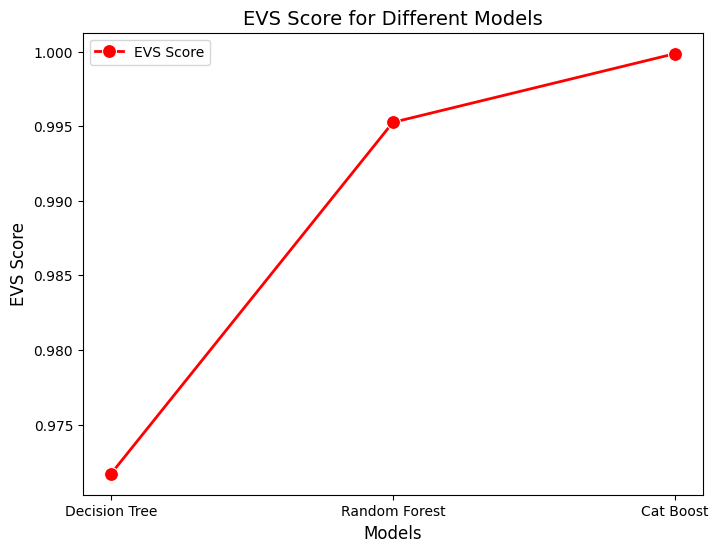

In [254]:
evs_score = [0.9717021317217132, 0.9952509085724094, 0.9998512723030883]
models = ['Decision Tree', 'Random Forest', 'Cat Boost']

plt.figure(figsize=(8, 6))

sns.lineplot(x=models, y=evs_score, marker='o', color='red', linewidth=2, label='EVS Score',markersize=10)

plt.title('EVS Score for Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('EVS Score', fontsize=12)


Text(0, 0.5, 'MSE Score')

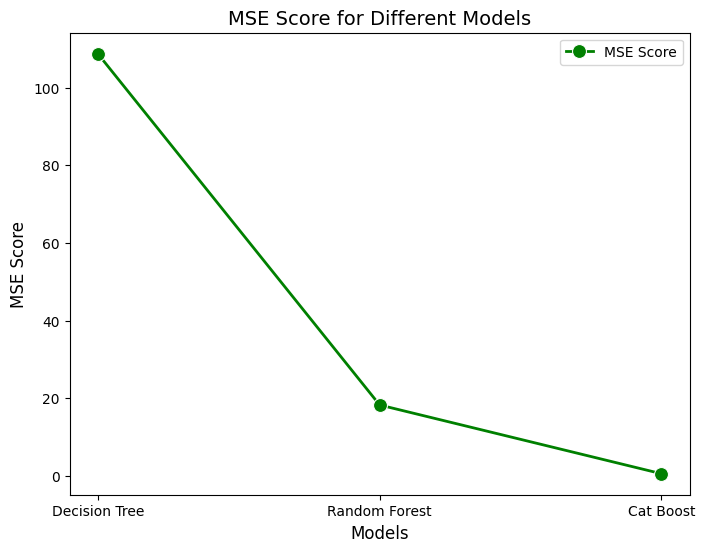

In [256]:
mse=[108.73416666666667,18.276597579678352,0.5715147237545747]
models = ['Decision Tree', 'Random Forest', 'Cat Boost']

plt.figure(figsize=(8, 6))

sns.lineplot(x=models, y=mse, marker='o', color='green', linewidth=2, label='MSE Score',markersize=10)

plt.title('MSE Score for Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MSE Score', fontsize=12)


Text(0, 0.5, 'RMSE Score')

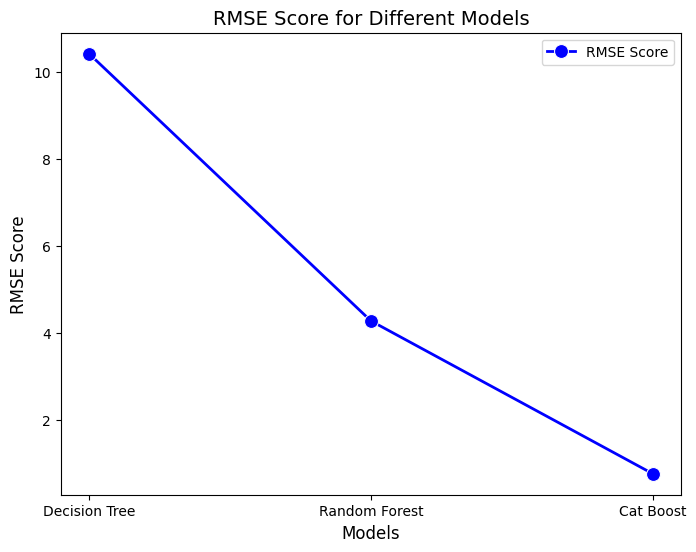

In [258]:
rmse=[10.427567629445837,4.2751137504958105,0.755985928278149]
models = ['Decision Tree', 'Random Forest', 'Cat Boost']

plt.figure(figsize=(8, 6))

sns.lineplot(x=models, y=rmse, marker='o', color='blue', linewidth=2, label='RMSE Score',markersize=10)

plt.title('RMSE Score for Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE Score', fontsize=12)